# Quiz 2, estadísticos y visualizaciones

Contexto: 'Floating Pandas, Inc.' es una empresa tecnológica innovadora que ofrece una plataforma de meditación y bienestar personalizada. El servicio se basa en una suscripción mensual de $10.80, proporcionando acceso a una variedad de meditaciones guiadas, ejercicios de mindfulness y herramientas de gestión del estrés adaptadas a las necesidades individuales de los usuarios. Esta tarifa permite a la empresa mantener una calidad alta en el contenido ofrecido y asegurar la actualización constante de su plataforma.

'Floating Pandas, Inc.' ha observado variaciones en la retención de clientes y busca identificar factores clave que podrían estar influyendo en este aspecto. La empresa está interesada en entender que es lo que esta afectando la relación a largo plazo con ellos así como esto impacta en el LTV esperado de sus clientes a 2 años.

Datos disponibles: .

Actividad 1):

- Objetivo: Identificar y visualizar factores que afectan la retención de clientes.
- Actividad: Utiliza gráficos para explorar la relación entre el NPS, los segmentos de clientes, y su Lifespan. Investiga si hay patrones o tendencias claras.
- Recomendación: Basándote en tus hallazgos, propone acciones específicas que 'Floating Pandas, Inc.' podría implementar para mejorar la retención y aumentar el LTV esperado de sus clientes.

Actividad 2):

Dada tu previa recomendación, ahora 'Floating Pandas, Inc.' está revisando su estrategia de asignación de recursos de marketing para maximizar el retorno sobre la inversión en diferentes segmentos de clientes.

- Objetivo: Analizar y comparar la efectividad del gasto en marketing en diferentes segmentos de clientes.
- Tarea: Calcula y visualiza cómo varía el CAC y el LTV a través del tiempo por segmento. Identifica cuáles segmentos ofrecen el mayor retorno sobre la inversión y cuáles podrían estar sub-optimizados.
- Recomendación: Formula estrategias de realineación de la inversión en marketing basadas en los datos analizados para optimizar los retornos futuros.

In [33]:
import pandas as pd
df=pd.read_csv("customer_data.csv")
df['LTV/CAC'] = df['Expected_LTV_in_Two_Years'] / df['CAC']
df.head()

,Customer_ID,Acquisition_Month,Segment,NPS_Score,Expected_Lifespan_Months,CAC,Technical_Issues,Expected_LTV_in_Two_Years,LTV/CAC
0,1,2022-01-31,Mid-Career,3,0,41.173062,2,0,0.000000
1,2,2022-01-31,Young Professional,6,5,41.173062,1,54,1.311537
2,3,2022-01-31,Mid-Career,5,22,41.173062,0,237,5.756191
3,4,2022-01-31,Mid-Career,8,15,41.173062,2,162,3.934611
4,5,2022-01-31,Young Professional,10,32,41.173062,0,259,6.290521


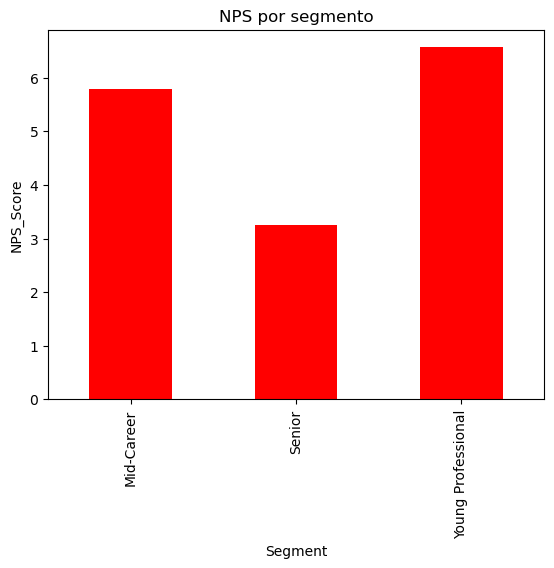

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df.groupby('Segment')['NPS_Score'].mean().plot(kind='bar', color='red')

plt.title('NPS por segmento')
plt.xlabel('Segment')
plt.ylabel('NPS_Score')
plt.show()


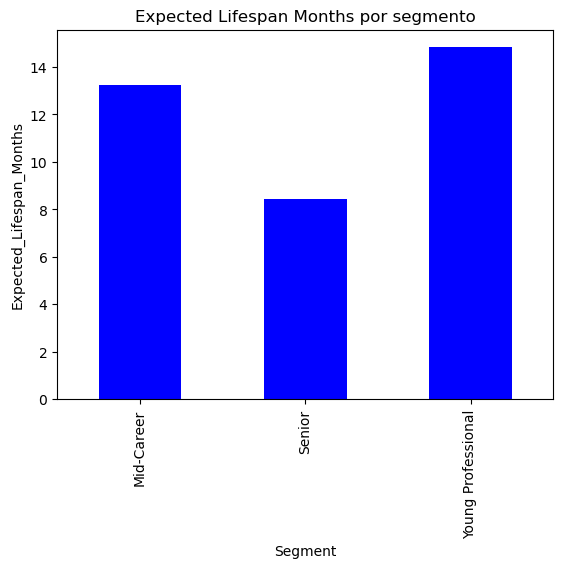

In [23]:
df.groupby('Segment')['Expected_Lifespan_Months'].mean().plot(kind='bar', color='blue')
plt.title('Expected Lifespan Months por segmento')
plt.xlabel('Segment')
plt.ylabel('Expected_Lifespan_Months')
plt.show()


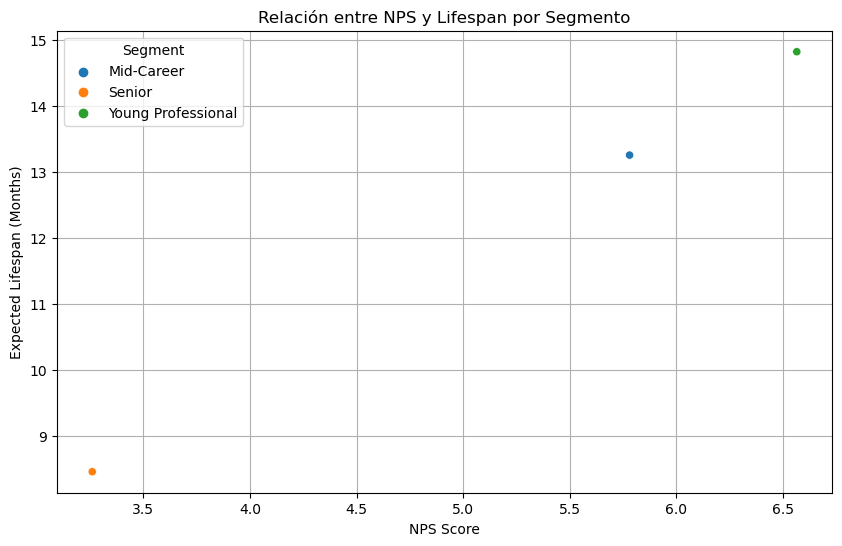

In [22]:
df.columns = df.columns.str.replace(' ', '_')
grouped_df = df.groupby("Segment").agg({"Expected_Lifespan_Months": "mean", "NPS_Score": "mean"}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='NPS_Score', y='Expected_Lifespan_Months', hue='Segment')
plt.title('Relación entre NPS y Lifespan por Segmento')
plt.xlabel('NPS Score')
plt.ylabel('Expected Lifespan (Months)')
plt.legend(title='Segment')
plt.grid()
plt.show()


### A mayor NPS, menor el tenure, mayor la expectativa de permanencia 

In [25]:
grouped_df

,Segment,Expected_Lifespan_Months,NPS_Score
0,Mid-Career,13.258014,5.781079
1,Senior,8.450925,3.260313
2,Young Professional,14.827225,6.565445


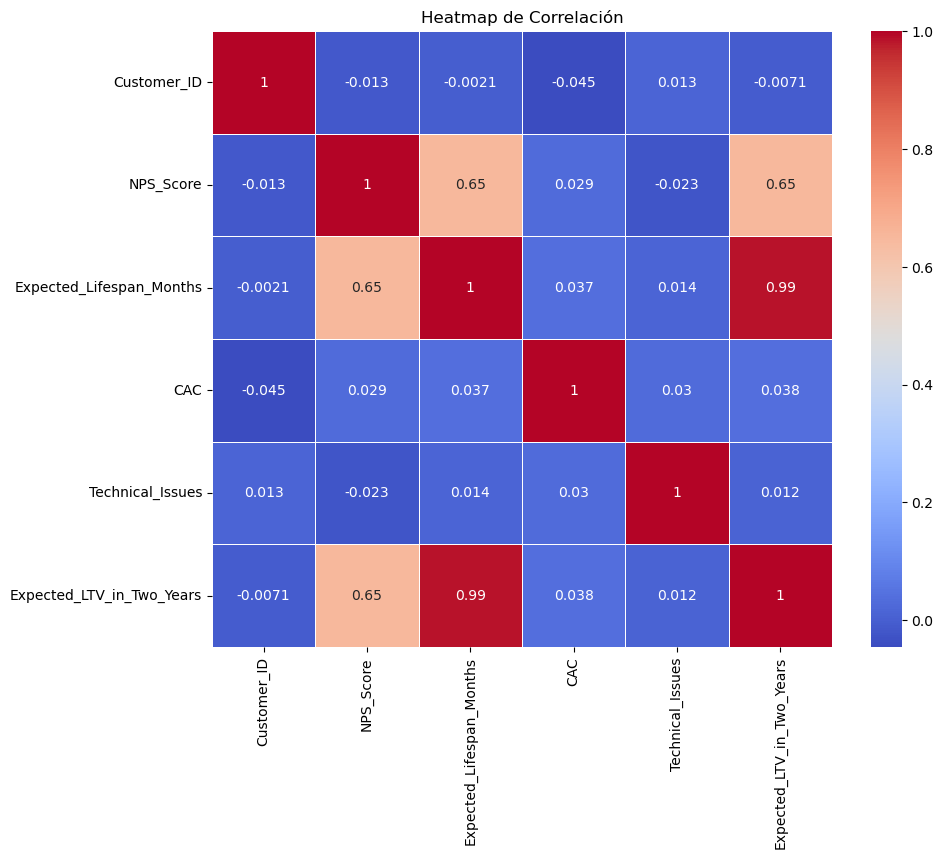

In [30]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación')
plt.show()
#Costumer id no nos sirve

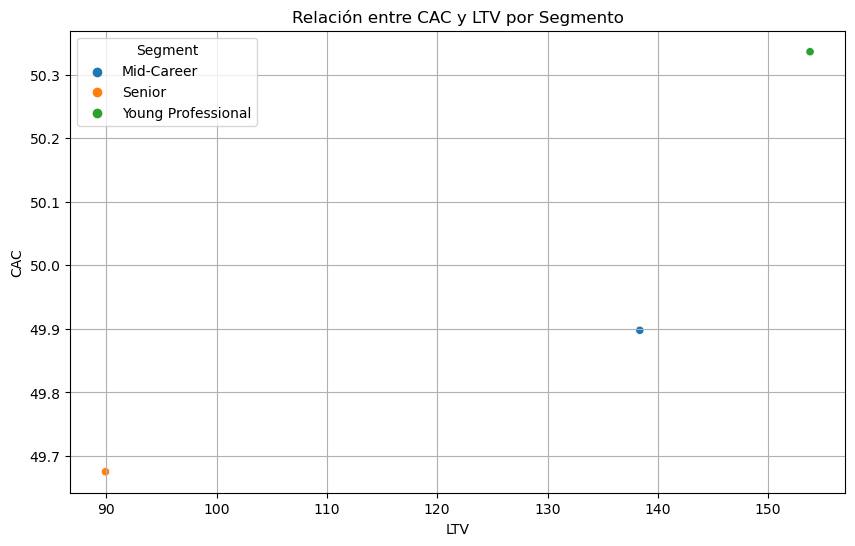

In [31]:
grouped_df2 = df.groupby("Segment").agg({"CAC": "mean", "Expected_LTV_in_Two_Years": "mean"}).reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df2, x='Expected_LTV_in_Two_Years', y='CAC', hue='Segment')
plt.title('Relación entre CAC y LTV por Segmento')
plt.xlabel('LTV')
plt.ylabel('CAC')
plt.legend(title='Segment')
plt.grid()
plt.show()

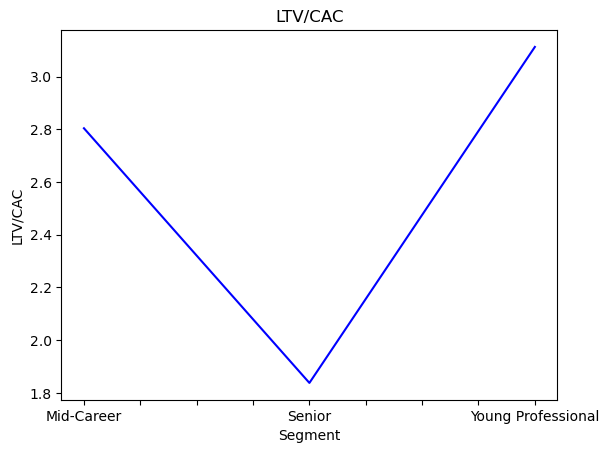

In [37]:
grouped_df2.groupby('Segment')['LTV/CAC'].mean().plot(kind='line', color='blue')
plt.title('LTV/CAC')
plt.xlabel('Segment')
plt.ylabel('LTV/CAC')
plt.show()


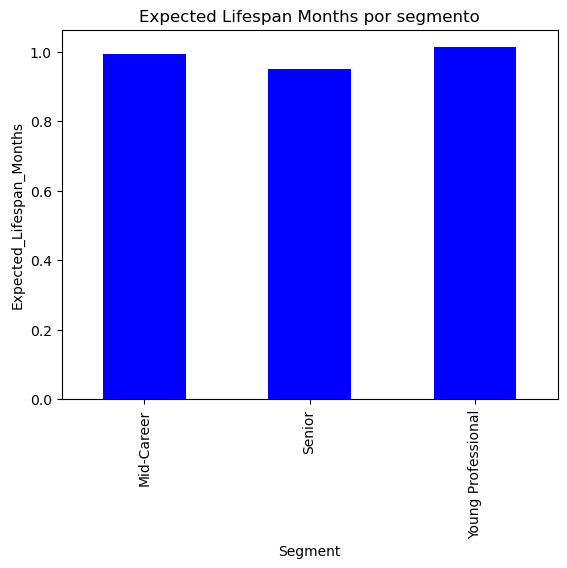

In [41]:
df.groupby('Segment')['Technical_Issues'].mean().plot(kind='bar', color='blue')
plt.title('Expected Lifespan Months por segmento')
plt.xlabel('Segment')
plt.ylabel('Expected_Lifespan_Months')
plt.show()


<Axes: xlabel='Acquisition_Month'>

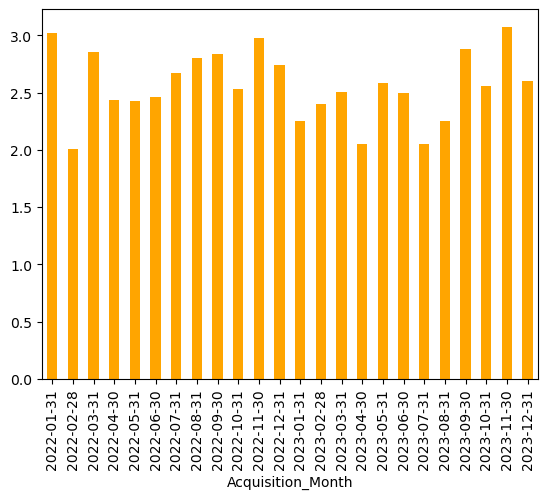

In [44]:
df.groupby('Acquisition_Month')['LTV/CAC'].mean().plot(kind='bar', color='orange')

<Axes: xlabel='Acquisition_Month'>

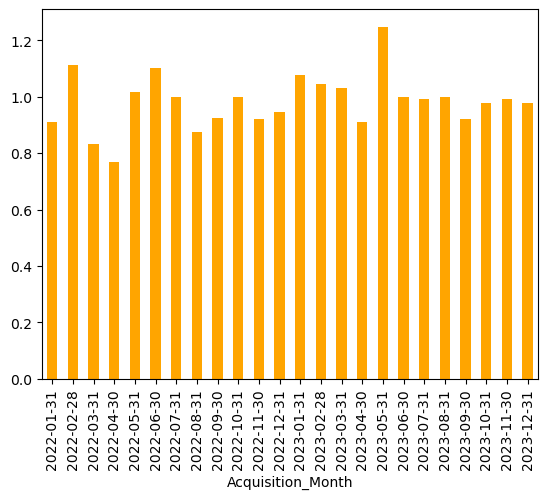

In [45]:
df.groupby('Acquisition_Month')['Technical_Issues'].mean().plot(kind='bar', color='orange')

# Conclusiones

Los clientes young professional son los que mas lealtad, expectativa de durar y rentabilidad (LTV/CAC), sin embargo podriamos disminuir el Cac al estar relacionado con los technical issues los cuales son altos en los clientes young professional, por lo tanto al ser quienes mayor dinero generan sobre lo que cuestan en promedio le daria prioridad a resolver sus technical issues e invertir mas en publicidad para el publico young professional ya que el cac esta relacionado con el NPS lo cual tiene relacion directa con mayor LTV :. mayor rentabilidad, tratar de rehacer lo que paso el 30 de nov del 2023 y evitar lo del 31 de mayo del 2023